In [2]:
# Import libraries
import numpy as np 
import pandas as pd 
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.offline.init_notebook_mode(connected=True)
# Read Data
df = pd.read_csv("covid_19_data.csv")
# Rename columns
df = df.rename(columns={'Country/Region':'Country'})
df = df.rename(columns={'ObservationDate':'Date'})
# Manipulate Dataframe
df_countries = df.groupby(['Country', 'Date']).sum().reset_index().sort_values('Date', ascending=False)
df_countries = df_countries.drop_duplicates(subset = ['Country'])
df_countries = df_countries[df_countries['Confirmed']>0]
# Create the Choropleth
fig = go.Figure(data=go.Choropleth(
    locations = df_countries['Country'],
    locationmode = 'country names',
    z = df_countries['Confirmed'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Confirmed Cases as of March 28, 2020',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)
fig.show()

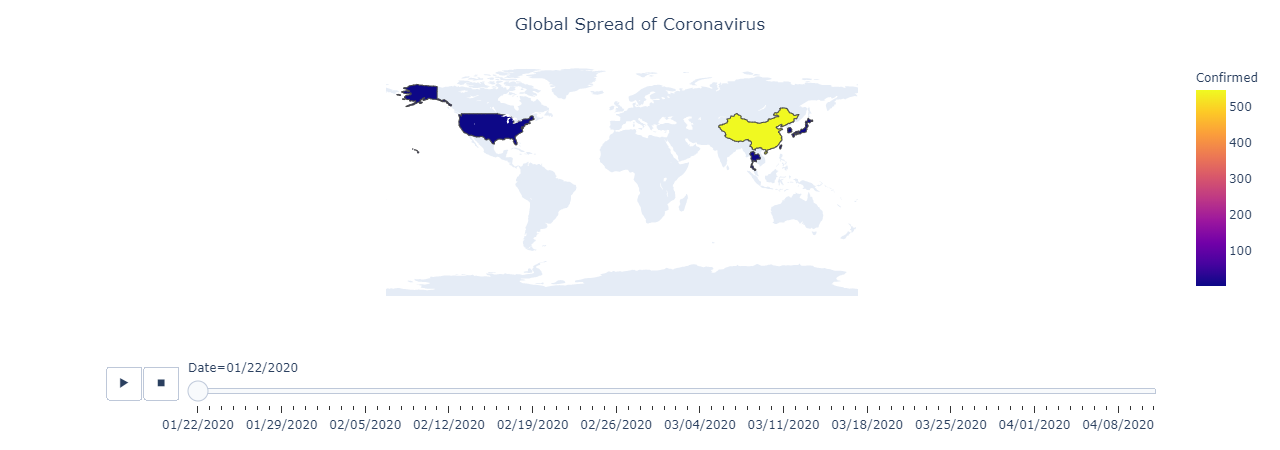

In [3]:
# Manipulating the original dataframe
df_countrydate = df[df['Confirmed']>0]
df_countrydate = df_countrydate.groupby(['Date','Country']).sum().reset_index()
df_countrydate
# Creating the visualization
fig = px.choropleth(df_countrydate, 
                    locations="Country", 
                    locationmode = "country names",
                    color="Confirmed", 
                    hover_name="Country", 
                    animation_frame="Date"
                   )
fig.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()